## Laboratorio 10 - Data Science

### Julio Avila y Elisa Samayoa

## Cargar los datos

Primero cargamos los datos

In [1]:
import pyreadstat

# Cargar datos desde un archivo SPSS
hogar, meta = pyreadstat.read_sav("ENCOVI_Hogar.sav")

# Acceder a los datos y la metadata
print(hogar.head())  # Muestra las primeras filas de datos
#print(hogar)         # Muestra la metadata

# Cargar datos desde un archivo SPSS
personas, meta = pyreadstat.read_sav("ENCOVI_Personas.sav")

# Acceder a los datos y la metadata
print(personas.head())  # Muestra las primeras filas de datos
#print(personas) 

   REGION  DEPTO  AREA  UPM  NUMHOG  FACTOR  FACTOR3  POBREZA  THOGAR  PPB01  \
0     1.0    1.0   1.0  1.0     1.0   525.0   1575.0      3.0     3.0    2.0   
1     1.0    1.0   1.0  1.0     2.0   525.0   1575.0      3.0     3.0    2.0   
2     1.0    1.0   1.0  1.0     3.0   525.0   9450.0      2.0    18.0    2.0   
3     1.0    1.0   1.0  1.0     4.0   525.0   3150.0      2.0     6.0    2.0   
4     1.0    1.0   1.0  1.0     5.0   525.0   1575.0      3.0     3.0    2.0   

   ...  P01H10  P01H11  P01H12  P01H13  P01H14  P01H15  P01H16  DIA_ENC  \
0  ...     NaN     NaN     NaN     NaN     NaN     NaN     NaN     22.0   
1  ...     NaN     NaN     NaN     NaN     NaN     NaN     NaN     27.0   
2  ...     1.0     1.0     1.0     1.0     1.0     1.0     1.0     22.0   
3  ...     2.0     2.0     2.0     2.0     2.0     2.0     2.0     24.0   
4  ...     NaN     NaN     NaN     NaN     NaN     NaN     NaN     22.0   

   MES_ENC   A_ENC  
0      8.0  2014.0  
1      8.0  2014.0  
2    

## Limpieza y pre procesamiento

Luego se procede a realizar limpieza de los mismos ya que hay muchos valores faltantes

In [2]:
missing_values_hogar = hogar.isnull().sum()
missing_values_personas = personas.isnull().sum()

print("Missing values in 'hogar' data frame:")
print(missing_values_hogar)

print("\nMissing values in 'personas' data frame:")
print(missing_values_personas)

Missing values in 'hogar' data frame:
REGION        0
DEPTO         0
AREA          0
UPM           0
NUMHOG        0
           ... 
P01H15     2641
P01H16     2641
DIA_ENC       0
MES_ENC       1
A_ENC         1
Length: 163, dtype: int64

Missing values in 'personas' data frame:
REGION         0
DEPTO          0
AREA           0
UPM            0
NUMHOG         0
           ...  
P11B02B    54247
P11B03A     8999
P11B03B    54612
P11B04A     9001
P11B04B    54549
Length: 465, dtype: int64


In [3]:

missing_values_hogar = hogar.isnull().sum()


columns_with_half_missing_hogar = missing_values_hogar[missing_values_hogar >= hogar.shape[0]/2].index


missing_values_personas = personas.isnull().sum()


columns_with_half_missing_personas = missing_values_personas[missing_values_personas >= personas.shape[0]/2].index


print("Columns in 'hogar' with missing values exceeding half of the total rows:")
print(columns_with_half_missing_hogar)

print("\nColumns in 'personas' with missing values exceeding half of the total rows:")
print(columns_with_half_missing_personas)


Columns in 'hogar' with missing values exceeding half of the total rows:
Index(['PPD04B', 'PPD04C', 'PPA11B', 'P01B03', 'P01C02A', 'P01C02B', 'P01C02C',
       'P01C02D', 'P01C02E', 'P01C02F', 'P01C02G', 'P01C02H', 'P01C02I',
       'P01C02J', 'P01C02K', 'P01C02L', 'P01C02M', 'P01C03A', 'P01C03B',
       'P01C03C', 'P01C03D', 'P01C03E', 'P01C04', 'P01D12', 'P01D13A',
       'P01D13B', 'P01D14', 'P01D15B', 'P01D20A', 'P01D20C', 'P01D20D',
       'P01D22A', 'P01D22B', 'P01D25', 'P01D26', 'P01E02_1', 'P01E03_1',
       'P01E02_2', 'P01E03_2', 'P01E02_3', 'P01E03_3', 'P01E02_4', 'P01E03_4',
       'P01E02_5', 'P01E03_5', 'P01E02_7', 'P01E03_7', 'P01E02_9', 'P01E03_9'],
      dtype='object')

Columns in 'personas' with missing values exceeding half of the total rows:
Index(['P03A02', 'P03A03B', 'P03A04', 'P04A01B', 'P04A05', 'P04A06A',
       'P04A09A', 'P05A01', 'P05A02', 'P05A03',
       ...
       'P11A05B', 'P11A06B', 'P11A07B', 'P11A08B', 'P11A09B', 'P11A10B',
       'P11B01B', 'P11B02

In [4]:

hogar_cleaned = hogar.drop(columns=columns_with_half_missing_hogar)


personas_cleaned = personas.drop(columns=columns_with_half_missing_personas)


remaining_missing_hogar = hogar_cleaned.columns[hogar_cleaned.isnull().any()]
print("Remaining columns in 'hogar' with missing values:")
print(hogar_cleaned[remaining_missing_hogar])


remaining_missing_personas = personas_cleaned.columns[personas_cleaned.isnull().any()]
print("\nRemaining columns in 'personas' with missing values:")
print(personas_cleaned[remaining_missing_personas])


Remaining columns in 'hogar' with missing values:
       PPD04A  PPD06  PPD07  PPD08  P01B02  P01C01  P01D05  P01D07  P01D08  \
0         3.0   25.0   25.0    2.0  3000.0     1.0     1.0     2.0     1.0   
1         3.0   25.0   25.0    2.0     NaN     NaN     1.0     2.0     1.0   
2        18.0   25.0   25.0    2.0     NaN     NaN     1.0     2.0     1.0   
3         6.0   25.0   25.0    2.0  1000.0     2.0     2.0     2.0     1.0   
4         3.0   25.0   25.0    2.0  4000.0     2.0     1.0     1.0     1.0   
...       ...    ...    ...    ...     ...     ...     ...     ...     ...   
11531     3.0   25.0   25.0    2.0   500.0     2.0     1.0     1.0     1.0   
11532    11.0   25.0   25.0    2.0   400.0     2.0     1.0     1.0     1.0   
11533     4.0   25.0   25.0    2.0   150.0     2.0     1.0     NaN     NaN   
11534     3.0   25.0   25.0    2.0  1000.0     2.0     1.0     1.0     1.0   
11535     6.0   25.0   25.0    2.0   300.0     2.0     1.0     NaN     NaN   

       P01D09

In [5]:

sorted_missing_values_hogar = hogar_cleaned.isnull().sum().sort_values(ascending=False)


print("Sorted count of missing values in remaining columns of 'hogar':")
print(sorted_missing_values_hogar)


sorted_missing_values_personas = personas_cleaned.isnull().sum().sort_values(ascending=False)


print("\nSorted count of missing values in remaining columns of 'personas':")
print(sorted_missing_values_personas)


Sorted count of missing values in remaining columns of 'hogar':
P01D29C    4940
P01D29B    4938
P01D30     4938
P01D09     2988
P01D11     2988
           ... 
PPA11A        0
P01A01        0
P01A02        0
P01A03        0
REGION        0
Length: 114, dtype: int64

Sorted count of missing values in remaining columns of 'personas':
P09F09B    25865
P09F09C    25865
P04A03A    24718
P04A02     24718
P04A04B    24100
           ...  
P07A02B        0
P08A01B        0
P08A01C        0
P08A03B        0
REGION         0
Length: 115, dtype: int64


In [6]:

top_missing_hogar_columns = sorted_missing_values_hogar.head(3).index


hogar_cleaned_final = hogar_cleaned.drop(columns=top_missing_hogar_columns)


top_missing_personas_columns = sorted_missing_values_personas.head(3).index


personas_cleaned_final = personas_cleaned.drop(columns=top_missing_personas_columns)


print("Final cleaned 'hogar' data frame:")
print(hogar_cleaned_final)

print("\nFinal cleaned 'personas' data frame:")
print(personas_cleaned_final)


Final cleaned 'hogar' data frame:
       REGION  DEPTO  AREA    UPM   NUMHOG  FACTOR  FACTOR3  POBREZA  THOGAR  \
0         1.0    1.0   1.0    1.0      1.0   525.0   1575.0      3.0     3.0   
1         1.0    1.0   1.0    1.0      2.0   525.0   1575.0      3.0     3.0   
2         1.0    1.0   1.0    1.0      3.0   525.0   9450.0      2.0    18.0   
3         1.0    1.0   1.0    1.0      4.0   525.0   3150.0      2.0     6.0   
4         1.0    1.0   1.0    1.0      5.0   525.0   1575.0      3.0     3.0   
...       ...    ...   ...    ...      ...     ...      ...      ...     ...   
11531     8.0   17.0   2.0  833.0  11532.0   305.0    915.0      3.0     3.0   
11532     8.0   17.0   2.0  833.0  11533.0   305.0   3355.0      1.0    11.0   
11533     8.0   17.0   2.0  833.0  11534.0   305.0   1220.0      2.0     4.0   
11534     8.0   17.0   2.0  833.0  11535.0   305.0    915.0      3.0     3.0   
11535     8.0   17.0   2.0  833.0  11536.0   305.0   1830.0      1.0     6.0   

     

In [7]:

print("Count of missing values in remaining columns of 'hogar' (after removal):")
print(hogar_cleaned_final.isnull().sum().sort_values(ascending=False))


print("\nCount of missing values in remaining columns of 'personas' (after removal):")
print(personas_cleaned_final.isnull().sum().sort_values(ascending=False))


Count of missing values in remaining columns of 'hogar' (after removal):
P01D11    2988
P01D09    2988
P01D07    2987
P01D10    2987
P01D08    2987
          ... 
PPA11A       0
P01A01       0
P01A02       0
DEPTO        0
REGION       0
Length: 111, dtype: int64

Count of missing values in remaining columns of 'personas' (after removal):
P04A02     24718
P04A04B    24100
P03B02     23922
P03B01     23922
PPA07      23853
           ...  
P07A02B        0
P08A01B        0
P08A01C        0
P08A03B        0
REGION         0
Length: 112, dtype: int64


In [8]:

threshold = 15000


columns_to_remove_personas = personas_cleaned_final.columns[personas_cleaned_final.isnull().sum() > threshold]


personas_cleaned_final = personas_cleaned_final.drop(columns=columns_to_remove_personas)


print("Final cleaned 'personas' data frame after removing columns with more than 15,000 missing values:")
print(personas_cleaned_final)


Final cleaned 'personas' data frame after removing columns with more than 15,000 missing values:
       REGION  DEPTO  AREA    UPM   NUMHOG  FACTOR  POBREZA  THOGAR   ID  \
0         1.0    1.0   1.0    1.0      1.0   525.0      3.0     3.0  1.0   
1         1.0    1.0   1.0    1.0      1.0   525.0      3.0     3.0  2.0   
2         1.0    1.0   1.0    1.0      1.0   525.0      3.0     3.0  3.0   
3         1.0    1.0   1.0    1.0      2.0   525.0      3.0     3.0  1.0   
4         1.0    1.0   1.0    1.0      2.0   525.0      3.0     3.0  2.0   
...       ...    ...   ...    ...      ...     ...      ...     ...  ...   
54817     8.0   17.0   2.0  833.0  11536.0   305.0      1.0     6.0  2.0   
54818     8.0   17.0   2.0  833.0  11536.0   305.0      1.0     6.0  3.0   
54819     8.0   17.0   2.0  833.0  11536.0   305.0      1.0     6.0  4.0   
54820     8.0   17.0   2.0  833.0  11536.0   305.0      1.0     6.0  5.0   
54821     8.0   17.0   2.0  833.0  11536.0   305.0      1.0     6.0

In [9]:

print("Count of missing values in remaining columns of 'hogar' (after removal):")
print(hogar_cleaned_final.isnull().sum().sort_values(ascending=False))


print("Count of missing values in remaining columns of 'personas' (after removal):")
print(personas_cleaned_final.isnull().sum().sort_values(ascending=False))


Count of missing values in remaining columns of 'hogar' (after removal):
P01D11    2988
P01D09    2988
P01D07    2987
P01D10    2987
P01D08    2987
          ... 
PPA11A       0
P01A01       0
P01A02       0
DEPTO        0
REGION       0
Length: 111, dtype: int64
Count of missing values in remaining columns of 'personas' (after removal):
P09F01C    10425
P09F01B    10425
P10A01      9157
P09F02A     9038
P09F02B     9038
           ...  
P07A02B        0
DEPTO          0
P08A01B        0
P08A01C        0
REGION         0
Length: 100, dtype: int64


Después de la limpieza y eliminación de columnas con demasiados valores faltantes, los restantes se llenan con la media ya que no representan un gran porcentaje de la cantidad de filas

In [10]:

# Fill missing values with the mean in 'hogar'
hogar_cleaned_final_mean_imputed = hogar_cleaned_final.fillna(hogar_cleaned_final.mean())

# Fill missing values with the mean in 'personas'
personas_cleaned_final_mean_imputed = personas_cleaned_final.fillna(personas_cleaned_final.mean())

# Print the final cleaned data frames with mean imputation
print("Final cleaned 'hogar' data frame with mean imputation:")
print(hogar_cleaned_final_mean_imputed)

print("\nFinal cleaned 'personas' data frame with mean imputation:")
print(personas_cleaned_final_mean_imputed)


C:\Users\USUARIO\AppData\Local\Temp\ipykernel_1344\148732552.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  hogar_cleaned_final_mean_imputed = hogar_cleaned_final.fillna(hogar_cleaned_final.mean())
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_1344\148732552.py:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  personas_cleaned_final_mean_imputed = personas_cleaned_final.fillna(personas_cleaned_final.mean())


Final cleaned 'hogar' data frame with mean imputation:
       REGION  DEPTO  AREA    UPM   NUMHOG  FACTOR  FACTOR3  POBREZA  THOGAR  \
0         1.0    1.0   1.0    1.0      1.0   525.0   1575.0      3.0     3.0   
1         1.0    1.0   1.0    1.0      2.0   525.0   1575.0      3.0     3.0   
2         1.0    1.0   1.0    1.0      3.0   525.0   9450.0      2.0    18.0   
3         1.0    1.0   1.0    1.0      4.0   525.0   3150.0      2.0     6.0   
4         1.0    1.0   1.0    1.0      5.0   525.0   1575.0      3.0     3.0   
...       ...    ...   ...    ...      ...     ...      ...      ...     ...   
11531     8.0   17.0   2.0  833.0  11532.0   305.0    915.0      3.0     3.0   
11532     8.0   17.0   2.0  833.0  11533.0   305.0   3355.0      1.0    11.0   
11533     8.0   17.0   2.0  833.0  11534.0   305.0   1220.0      2.0     4.0   
11534     8.0   17.0   2.0  833.0  11535.0   305.0    915.0      3.0     3.0   
11535     8.0   17.0   2.0  833.0  11536.0   305.0   1830.0      

Pasamos la variable a predecir, POBREZA a int ya que era float

In [11]:
# Convertir 'POBREZA' a tipo entero en la base de datos 'hogar'
hogar_cleaned_final_mean_imputed['POBREZA'] = hogar_cleaned_final_mean_imputed['POBREZA'].astype(int)

# Convertir 'POBREZA' a tipo entero en la base de datos 'personas'
personas_cleaned_final_mean_imputed['POBREZA'] = personas_cleaned_final_mean_imputed['POBREZA'].astype(int)

# Imprimir las bases de datos con 'POBREZA' convertido a tipo entero
print("Base de datos 'hogar' con 'POBREZA' convertido a tipo entero:")
print(hogar_cleaned_final_mean_imputed)

print("\nBase de datos 'personas' con 'POBREZA' convertido a tipo entero:")
print(personas_cleaned_final_mean_imputed)


Base de datos 'hogar' con 'POBREZA' convertido a tipo entero:
       REGION  DEPTO  AREA    UPM   NUMHOG  FACTOR  FACTOR3  POBREZA  THOGAR  \
0         1.0    1.0   1.0    1.0      1.0   525.0   1575.0        3     3.0   
1         1.0    1.0   1.0    1.0      2.0   525.0   1575.0        3     3.0   
2         1.0    1.0   1.0    1.0      3.0   525.0   9450.0        2    18.0   
3         1.0    1.0   1.0    1.0      4.0   525.0   3150.0        2     6.0   
4         1.0    1.0   1.0    1.0      5.0   525.0   1575.0        3     3.0   
...       ...    ...   ...    ...      ...     ...      ...      ...     ...   
11531     8.0   17.0   2.0  833.0  11532.0   305.0    915.0        3     3.0   
11532     8.0   17.0   2.0  833.0  11533.0   305.0   3355.0        1    11.0   
11533     8.0   17.0   2.0  833.0  11534.0   305.0   1220.0        2     4.0   
11534     8.0   17.0   2.0  833.0  11535.0   305.0    915.0        3     3.0   
11535     8.0   17.0   2.0  833.0  11536.0   305.0   1830.

## Análisis estadísticos

Ahora hacemos un análisis estadístico de las variables para encontrar cuales son las mejores a utilizar para los modelos

In [75]:
# Calcular correlación en la base de datos 'hogar'
correlation_hogar = hogar_cleaned_final_mean_imputed.corr()['POBREZA']

# Filtrar variables con correlación mayor o igual a 0.5 en 'hogar'
high_corr_variables_hogar = correlation_hogar[abs(correlation_hogar) >= 0.1].index.tolist()

# Imprimir lista de variables con correlación mayor o igual a 0.1 en 'hogar'
print("Variables en 'hogar' con correlación mayor o igual a 0.1 con 'POBREZA':")
print(high_corr_variables_hogar)

# Calcular correlación en la base de datos 'personas'
correlation_personas = personas_cleaned_final_mean_imputed.corr()['POBREZA']

# Filtrar variables con correlación mayor o igual a 0.5 en 'personas'
high_corr_variables_personas = correlation_personas[abs(correlation_personas) >= 0.1].index.tolist()

# Imprimir lista de variables con correlación mayor o igual a 0.1 en 'personas'
print("\nVariables en 'personas' con correlación mayor o igual a 0.1 con 'POBREZA':")
print(high_corr_variables_personas)


C:\Users\USUARIO\AppData\Local\Temp\ipykernel_1344\2691544929.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_hogar = hogar_cleaned_final_mean_imputed.corr()['POBREZA']


Variables en 'hogar' con correlación mayor o igual a 0.1 con 'POBREZA':
['REGION', 'DEPTO', 'AREA', 'UPM', 'NUMHOG', 'FACTOR3', 'POBREZA', 'THOGAR', 'PPB04', 'PPD04A', 'PPD06', 'PPD07', 'PPD08', 'P01A02', 'P01A04', 'P01A05A', 'P01A05B', 'P01A05C', 'P01A05D', 'P01A05E', 'P01A05F', 'P01A06', 'P01B02', 'P01D01', 'P01D02', 'P01D04', 'P01D08', 'P01D09', 'P01D17', 'P01D19A', 'P01D19B', 'P01D19C', 'P01D19D', 'P01D20B', 'P01D23A', 'P01D27', 'P01E01_1', 'P01E01_2', 'P01E01_3', 'P01E01_4', 'P01E01_5', 'P01E01_6', 'P01E02_6', 'P01E03_6', 'P01E01_8', 'P01H09']


C:\Users\USUARIO\AppData\Local\Temp\ipykernel_1344\2691544929.py:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_personas = personas_cleaned_final_mean_imputed.corr()['POBREZA']



Variables en 'personas' con correlación mayor o igual a 0.1 con 'POBREZA':
['REGION', 'DEPTO', 'AREA', 'UPM', 'NUMHOG', 'POBREZA', 'THOGAR', 'ID', 'PPA03', 'PPA04C', 'PPA06', 'PPA08', 'P04A01A', 'P04A04A', 'P04A07A', 'P04A08A', 'P04A11A', 'P06B01', 'P06B03', 'P06B25A', 'P06B26', 'P08A01A', 'P08A02', 'P09C08A', 'P09C09A', 'P09E01A', 'P09F02A', 'P09F08A', 'P09F09A', 'P10A01']


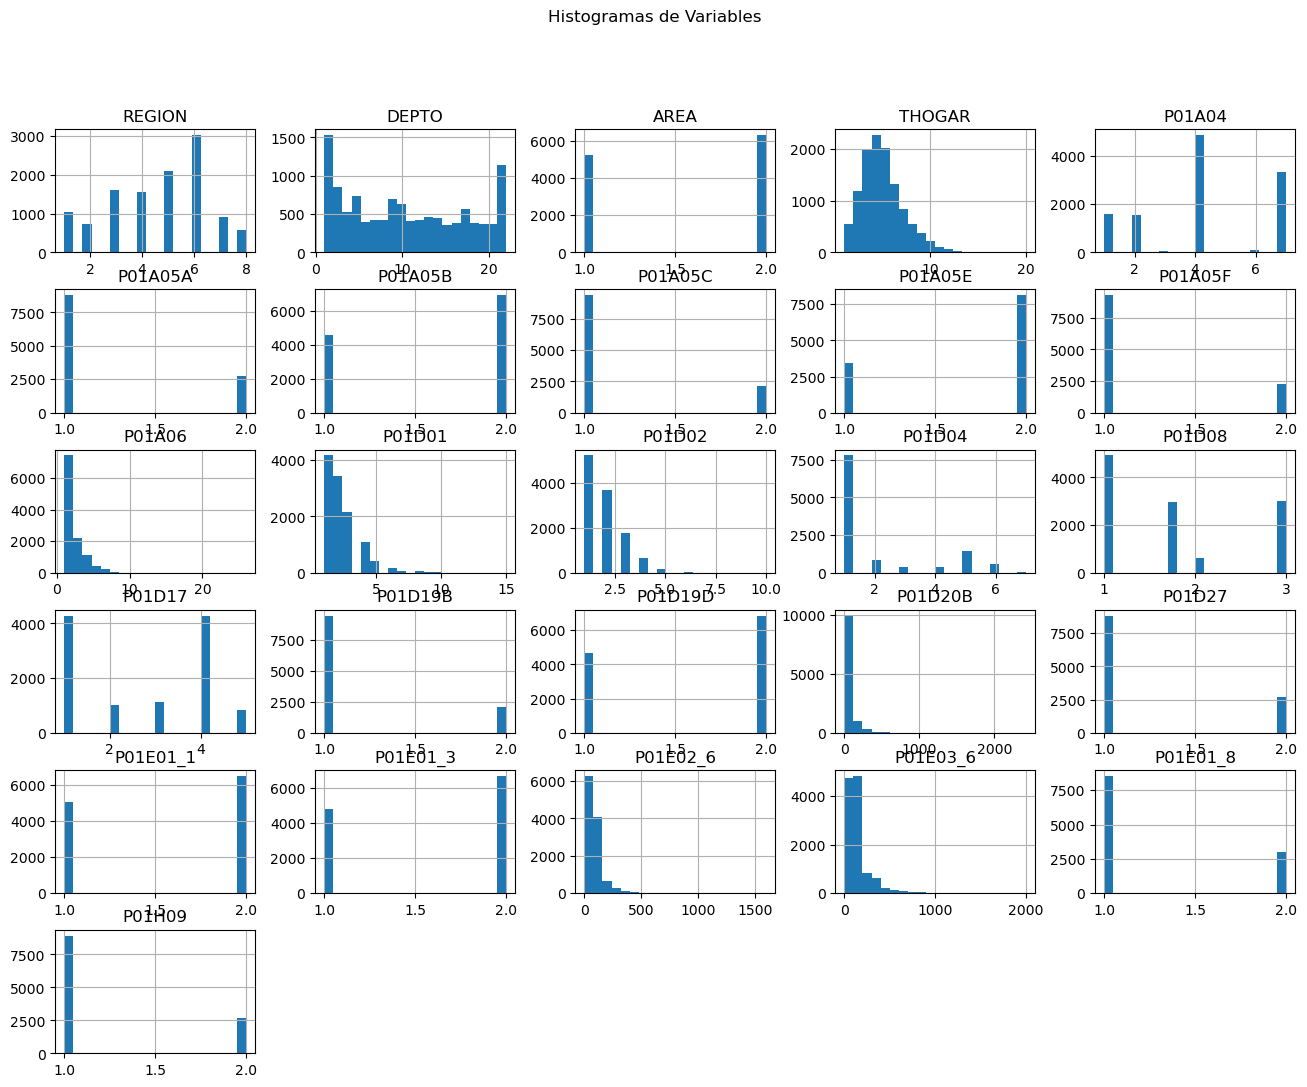

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar las columnas especificadas
selected_variables = ['REGION', 'DEPTO', 'AREA', 'THOGAR',
                        'P01A04', 'P01A05A', 'P01A05B', 'P01A05C',
                       'P01A05E', 'P01A05F', 'P01A06', 'P01D01', 'P01D02', 'P01D04', 'P01D08',
                       'P01D17', 'P01D19B', 'P01D19D', 'P01D20B', 'P01D27',
                       'P01E01_1', 'P01E01_3', 'P01E02_6', 'P01E03_6',
                       'P01E01_8', 'P01H09']

# Filtrar el DataFrame con las columnas seleccionadas y eliminar filas con valores nulos
df = hogar_cleaned_final_mean_imputed[selected_variables].dropna()

# Resumen estadístico
resumen_estadistico = df.describe()

# Histogramas
df.hist(bins=20, figsize=(16, 12))
plt.suptitle('Histogramas de Variables')
plt.show()



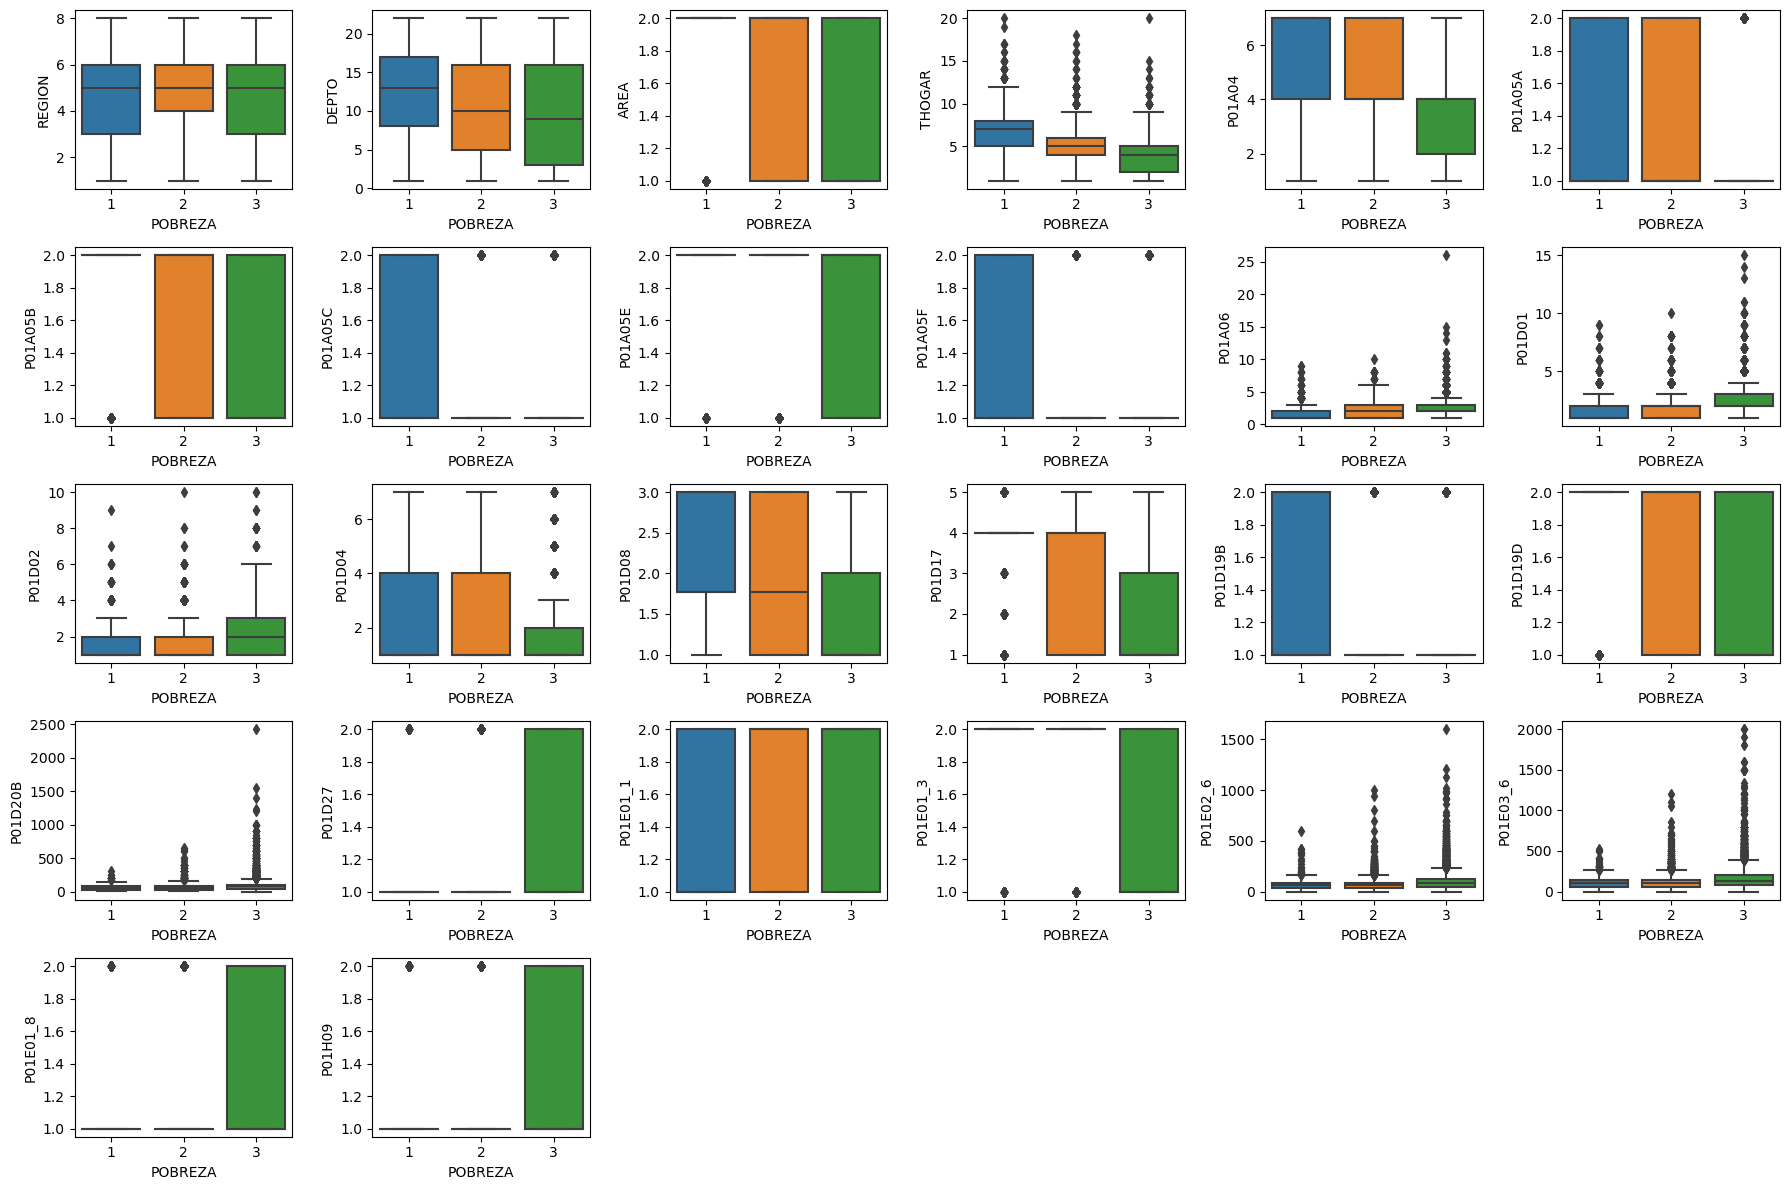

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar las columnas especificadas
selected_variables = ['REGION', 'DEPTO', 'AREA', 'THOGAR',
                        'P01A04', 'P01A05A', 'P01A05B', 'P01A05C',
                       'P01A05E', 'P01A05F', 'P01A06', 'P01D01', 'P01D02', 'P01D04', 'P01D08',
                       'P01D17', 'P01D19B', 'P01D19D', 'P01D20B', 'P01D27',
                       'P01E01_1', 'P01E01_3', 'P01E02_6', 'P01E03_6',
                       'P01E01_8', 'P01H09', 'POBREZA']

# Filtrar el DataFrame con las columnas seleccionadas y eliminar filas con valores nulos
df_selected = hogar_cleaned_final_mean_imputed[selected_variables].dropna()

# Configurar el tamaño del gráfico
plt.figure(figsize=(18, 12))

# Crear boxplots para cada variable respecto a 'POBREZA'
for i, variable in enumerate(selected_variables[:-1]):  # Excluir la variable 'POBREZA'
    plt.subplot(5, 6, i + 1)
    sns.boxplot(x='POBREZA', y=variable, data=df_selected)

# Ajustar diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()


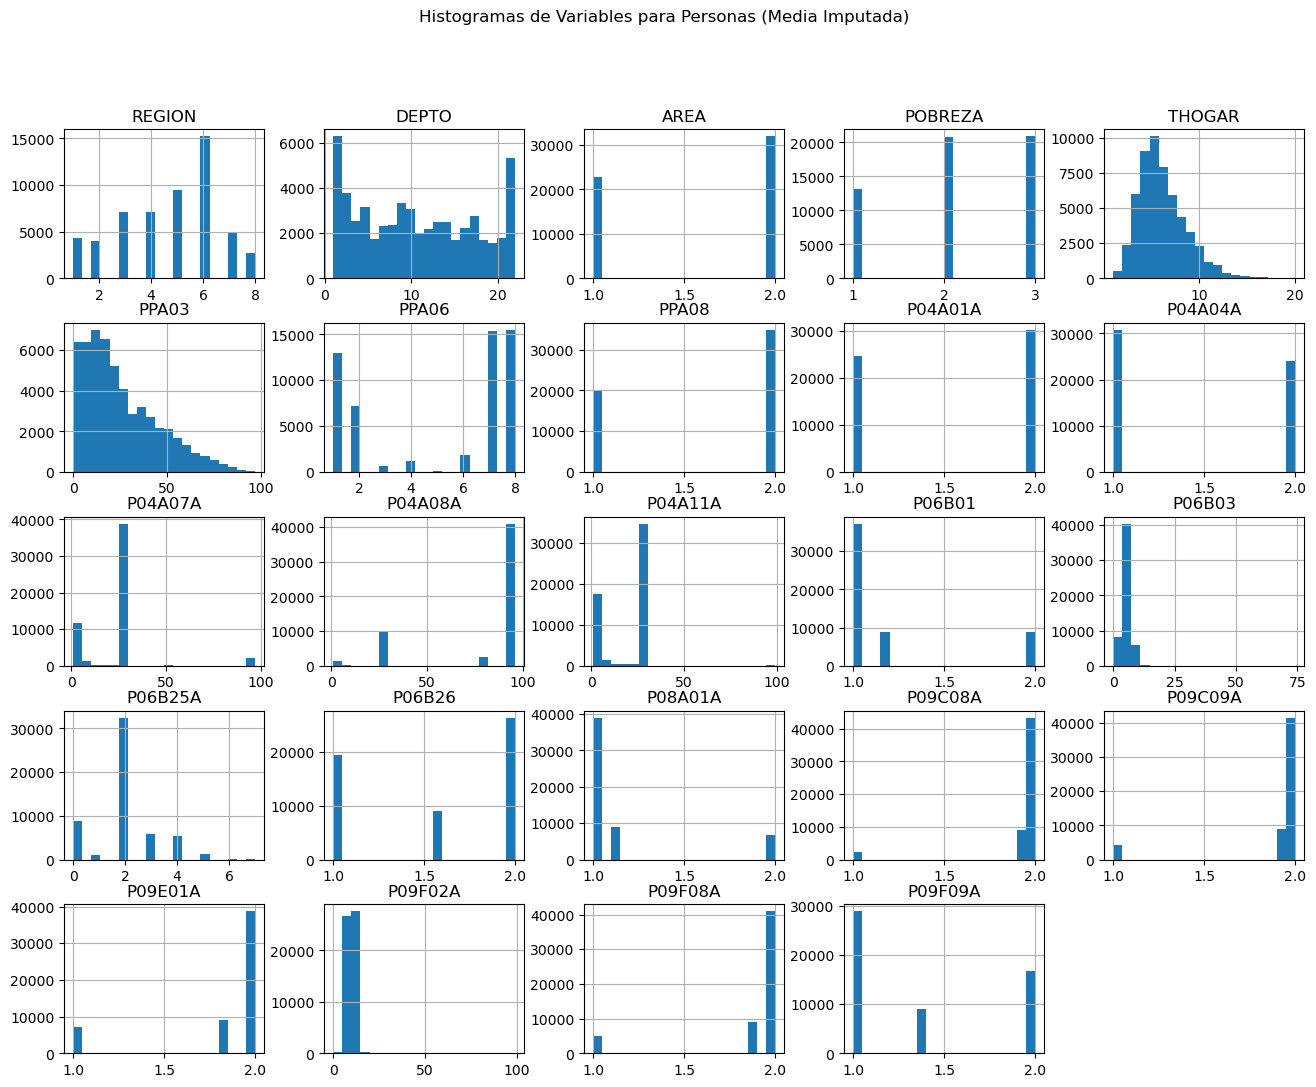

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar las columnas especificadas
selected_variables_personas = ['REGION', 'DEPTO', 'AREA', 'POBREZA', 'THOGAR',  'PPA03', 
                               'PPA06', 'PPA08', 'P04A01A', 'P04A04A', 'P04A07A', 'P04A08A', 'P04A11A', 'P06B01', 
                               'P06B03', 'P06B25A', 'P06B26', 'P08A01A', 'P09C08A', 'P09C09A', 'P09E01A', 
                               'P09F02A', 'P09F08A', 'P09F09A']

# Filtrar el DataFrame con las columnas seleccionadas y eliminar filas con valores nulos
df_personas_cleaned_mean_imputed = personas_cleaned_final_mean_imputed[selected_variables_personas]

# Resumen estadístico
resumen_estadistico = df_personas_cleaned_mean_imputed.describe()

# Histogramas

df_personas_cleaned_mean_imputed.hist(bins=20, figsize=(16, 12))
plt.suptitle('Histogramas de Variables para Personas (Media Imputada)')
plt.show()


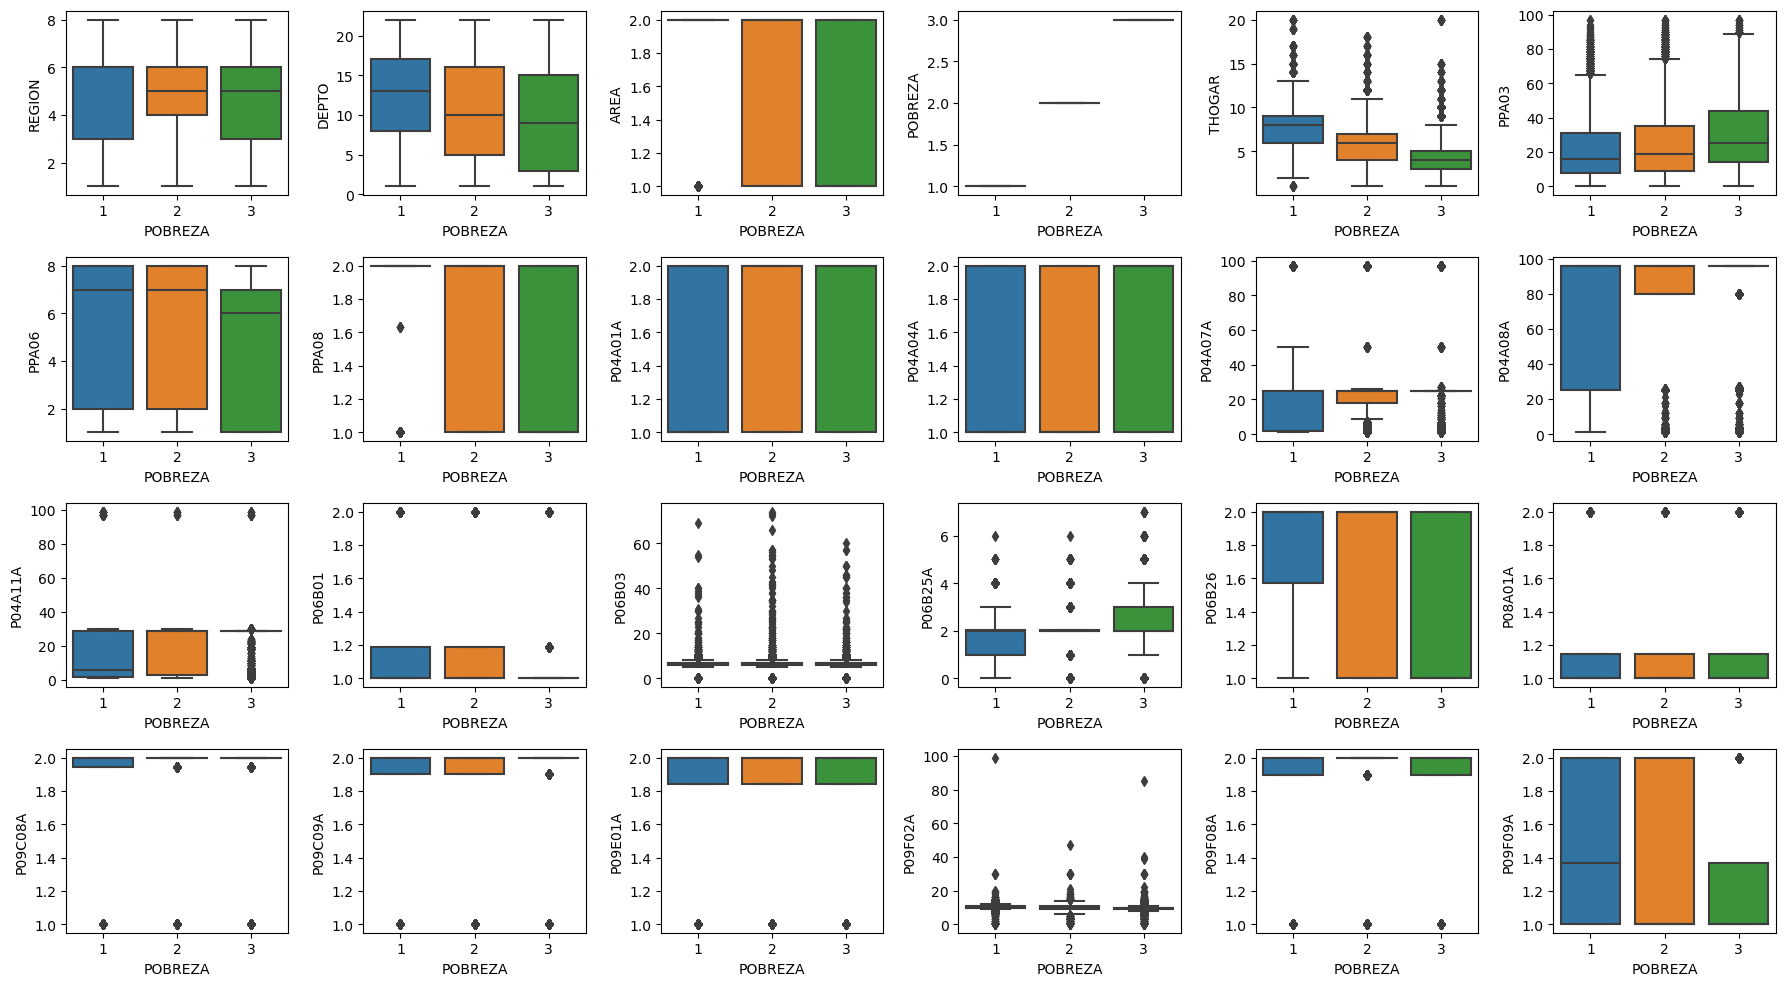

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar las columnas especificadas
selected_variables_personas = ['REGION', 'DEPTO', 'AREA', 'POBREZA', 'THOGAR',  'PPA03', 
                               'PPA06', 'PPA08', 'P04A01A', 'P04A04A', 'P04A07A', 'P04A08A', 'P04A11A', 'P06B01', 
                               'P06B03', 'P06B25A', 'P06B26', 'P08A01A', 'P09C08A', 'P09C09A', 'P09E01A', 
                               'P09F02A', 'P09F08A', 'P09F09A']

# Filtrar el DataFrame con las columnas seleccionadas y eliminar filas con valores nulos
df_selected = personas_cleaned_final_mean_imputed[selected_variables_personas].dropna()

# Configurar el tamaño del gráfico
plt.figure(figsize=(18, 12))

# Crear boxplots para cada variable respecto a 'POBREZA'
for i, variable in enumerate(selected_variables_personas):  # Excluir la variable 'POBREZA'
    plt.subplot(5, 6, i + 1)
    sns.boxplot(x='POBREZA', y=variable, data=df_selected)

# Ajustar diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()


## Realización de modelos

Después de hacer el análisis estadístico de las variables con una correlación considerable, elegimos las variables a usar en los modelos.
En el modelo de hogar, serían:

Region
Depto
Area
THOGAR
P01A04
P01A05A
P01A05B
P01A06
P01D01
P01D02
P01D04
P01D08
P01D17
P01D19D
P01D20B
P01E01_1
P01E02_6
P01E03_6

y en el modelo de personas serían:

REGION
DEPTO
AREA
THOGAR
PPA03
PPA06
PPA08
P04A01A
P04A04A
P04A07A
P04A08A
P04A11A
P06B01
P06B03
P06B25A
P06B26
P08A01A
P09C08A
P09C09A
P09E01A
P09F02A
P09F08A
P09F09A


Tras elegir las variables, se crean los modelos. Se hace para cada base de datos un modelo de regresión, un random forest y una red neuronal para encontrar el mejor modelo para ralizar la predicción, la métrica que se utilizará para resolverlo será el rmse, donde mientras más cercano es a 0, es mejor.

Primero se realiza para la base de datos de hogares

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt


In [58]:
# Seleccionar las variables predictoras
selected_features = ['REGION', 'DEPTO', 'THOGAR', 'P01A04', 'P01A05A', 'P01A05B', 'P01A06',
                     'P01D01', 'P01D02', 'P01D04', 'P01D08', 'P01D17', 'P01D19D', 'P01D20B',
                     'P01E02_6', 'P01E03_6']

# Seleccionar la variable objetivo
target_variable = 'POBREZA'

# Filtrar el DataFrame con las columnas seleccionadas
df_hogar_selected = hogar_cleaned_final_mean_imputed[selected_features + [target_variable]].dropna()

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df_hogar_selected[selected_features], 
                                                    df_hogar_selected[target_variable], 
                                                    test_size=0.2, random_state=42)



In [59]:
# Modelo de Regresión Lineal
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)
regression_predictions = regression_model.predict(X_test)
regression_rmse = sqrt(mean_squared_error(y_test, regression_predictions))
print(f"Regresión Lineal RMSE: {regression_rmse}")



Regresión Lineal RMSE: 0.514009442541057


In [60]:
# Modelo Random Forest
random_forest_model = RandomForestRegressor()
random_forest_model.fit(X_train, y_train)
rf_predictions = random_forest_model.predict(X_test)
rf_rmse = sqrt(mean_squared_error(y_test, rf_predictions))
print(f"Random Forest RMSE: {rf_rmse}")


Random Forest RMSE: 0.4950994511744218


In [67]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from tensorflow.keras.optimizers import Adam

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(hogar_cleaned_final_mean_imputed[['REGION', 'DEPTO', 'AREA', 'THOGAR',
                        'P01A04', 'P01A05A', 'P01A05B', 'P01A05C',
                       'P01A05E', 'P01A05F', 'P01A06', 'P01D01', 'P01D02', 'P01D04', 'P01D08',
                       'P01D17', 'P01D19D', 'P01D20B', 'P01E01_1', 'P01E02_6', 'P01E03_6']], hogar_cleaned_final_mean_imputed['POBREZA'], test_size=0.2, random_state=42)

# Normalizar los datos
X_train_normalized = (X_train - X_train.mean()) / X_train.std()
X_test_normalized = (X_test - X_train.mean()) / X_train.std()

# Construir el modelo de red neuronal
model = Sequential()
model.add(Dense(64, input_dim=X_train_normalized.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='linear'))

model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Entrenar el modelo
model.fit(X_train_normalized, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluar el modelo en el conjunto de prueba
nn_predictions = model.predict(X_test_normalized)
nn_rmse = sqrt(mean_squared_error(y_test, nn_predictions))
print(f"Red Neuronal RMSE en conjunto de prueba: {nn_rmse}")


Epoch 1/50
231/231 [==============================] - 2s 3ms/step - loss: 2.0875 - val_loss: 0.5461
Epoch 2/50
231/231 [==============================] - 1s 3ms/step - loss: 1.0726 - val_loss: 0.4195
Epoch 3/50
231/231 [==============================] - 1s 3ms/step - loss: 0.8861 - val_loss: 0.4003
Epoch 4/50
231/231 [==============================] - 1s 3ms/step - loss: 0.7762 - val_loss: 0.3432
Epoch 5/50
231/231 [==============================] - 1s 3ms/step - loss: 0.6747 - val_loss: 0.3191
Epoch 6/50
231/231 [==============================] - 1s 3ms/step - loss: 0.6153 - val_loss: 0.3231
Epoch 7/50
231/231 [==============================] - 1s 3ms/step - loss: 0.5680 - val_loss: 0.3018
Epoch 8/50
231/231 [==============================] - 1s 3ms/step - loss: 0.5427 - val_loss: 0.3028
Epoch 9/50
231/231 [==============================] - 1s 3ms/step - loss: 0.4892 - val_loss: 0.3152
Epoch 10/50
231/231 [==============================] - 1s 3ms/step - loss: 0.4788 - val_loss: 0.2876

In [68]:
# Mostrar resultados
print(f"Regresión Lineal RMSE: {regression_rmse}")
print(f"Random Forest RMSE: {rf_rmse}")
print(f"Red Neuronal RMSE: {nn_rmse}")

Regresión Lineal RMSE: 0.514009442541057
Random Forest RMSE: 0.4950994511744218
Red Neuronal RMSE: 0.5050387118355069


Finalmente se hace para la base de datos de personas

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from math import sqrt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [70]:
# Seleccionar las variables predictoras
selected_features_personas = ['REGION', 'DEPTO', 'AREA', 'THOGAR', 'PPA03', 'PPA06', 'PPA08', 'P04A01A', 'P04A04A',
                              'P04A07A', 'P04A08A', 'P04A11A', 'P06B01', 'P06B03', 'P06B25A', 'P06B26', 'P08A01A',
                              'P09C08A', 'P09C09A', 'P09E01A', 'P09F02A', 'P09F08A', 'P09F09A']

# Seleccionar la variable objetivo
target_variable_personas = 'POBREZA'

# Filtrar el DataFrame con las columnas seleccionadas y eliminar filas con valores nulos
df_personas_selected = personas_cleaned_final_mean_imputed[selected_features_personas + [target_variable_personas]].dropna()

# Dividir el conjunto de datos en entrenamiento y prueba
X_train_personas, X_test_personas, y_train_personas, y_test_personas = train_test_split(
    df_personas_selected[selected_features_personas], df_personas_selected[target_variable_personas],
    test_size=0.2, random_state=42
)

# Normalizar los datos
scaler_personas = StandardScaler()
X_train_normalized_personas = scaler_personas.fit_transform(X_train_personas)
X_test_normalized_personas = scaler_personas.transform(X_test_personas)


In [71]:
# Modelo de Regresión Lineal
regression_model_personas = LinearRegression()
regression_model_personas.fit(X_train_normalized_personas, y_train_personas)
regression_predictions_personas = regression_model_personas.predict(X_test_normalized_personas)
regression_rmse_personas = sqrt(mean_squared_error(y_test_personas, regression_predictions_personas))
print(f"Regresión Lineal RMSE para personas: {regression_rmse_personas}")



Regresión Lineal RMSE para personas: 0.5964444889804388


In [72]:
# Modelo Random Forest
random_forest_model_personas = RandomForestRegressor()
random_forest_model_personas.fit(X_train_normalized_personas, y_train_personas)
rf_predictions_personas = random_forest_model_personas.predict(X_test_normalized_personas)
rf_rmse_personas = sqrt(mean_squared_error(y_test_personas, rf_predictions_personas))
print(f"Random Forest RMSE para personas: {rf_rmse_personas}")



Random Forest RMSE para personas: 0.5448930320541682


In [73]:
# Modelo de Red Neuronal
model_personas = Sequential()
model_personas.add(Dense(64, input_dim=X_train_normalized_personas.shape[1], activation='relu'))
model_personas.add(Dropout(0.5))
model_personas.add(Dense(32, activation='relu'))
model_personas.add(Dropout(0.5))
model_personas.add(Dense(1, activation='linear'))

model_personas.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Entrenar el modelo
model_personas.fit(X_train_normalized_personas, y_train_personas, epochs=50, batch_size=32, validation_split=0.2)

# Evaluar el modelo en el conjunto de prueba
nn_predictions_personas = model_personas.predict(X_test_normalized_personas)
nn_rmse_personas = sqrt(mean_squared_error(y_test_personas, nn_predictions_personas))
print(f"Red Neuronal RMSE para personas: {nn_rmse_personas}")

Epoch 1/50
1097/1097 [==============================] - 3s 2ms/step - loss: 1.1253 - val_loss: 0.4485
Epoch 2/50
1097/1097 [==============================] - 3s 3ms/step - loss: 0.5843 - val_loss: 0.3676
Epoch 3/50
1097/1097 [==============================] - 3s 2ms/step - loss: 0.4637 - val_loss: 0.3547
Epoch 4/50
1097/1097 [==============================] - 2s 2ms/step - loss: 0.4121 - val_loss: 0.3528
Epoch 5/50
1097/1097 [==============================] - 3s 2ms/step - loss: 0.3894 - val_loss: 0.3502
Epoch 6/50
1097/1097 [==============================] - 2s 2ms/step - loss: 0.3806 - val_loss: 0.3493
Epoch 7/50
1097/1097 [==============================] - 2s 2ms/step - loss: 0.3756 - val_loss: 0.3458
Epoch 8/50
1097/1097 [==============================] - 2s 2ms/step - loss: 0.3714 - val_loss: 0.3427
Epoch 9/50
1097/1097 [==============================] - 3s 3ms/step - loss: 0.3684 - val_loss: 0.3474
Epoch 10/50
1097/1097 [==============================] - 3s 3ms/step - loss: 0.367

In [74]:
# Imprimir resultados
print(f"Regresión Lineal RMSE para personas: {regression_rmse_personas}")
print(f"Random Forest RMSE para personas: {rf_rmse_personas}")
print(f"Red Neuronal RMSE para personas: {nn_rmse_personas}")


Regresión Lineal RMSE para personas: 0.5964444889804388
Random Forest RMSE para personas: 0.5448930320541682
Red Neuronal RMSE para personas: 0.5775876367919405


## Conclusión final

En ambos casos, el modelo con los mejores resultados fue el Random Forest